In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt 

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
X_array_1 = pd.read_csv('ArOpt15.csv', header=None).values
Y_array_1 = pd.read_csv('ArOpt15Label.csv', header=None).values.T
# Y_array_1 = Y_array_1/Y_array_1.max()

X_array_2 = pd.read_csv('Ar15.csv', header=None).values
Y_array_2 = pd.read_csv('Ar15Label.csv', header=None).values.T
# Y_array_2 = Y_array_2/Y_array_2.max()

X_array_3 = pd.read_csv('Ar25.csv', header=None).values
Y_array_3 = pd.read_csv('Ar25Label.csv', header=None).values.T
# Y_array_3 = Y_array_3/Y_array_3.max()

X_array_4 = pd.read_csv('ArOpt.csv', header=None).values
Y_array_4 = pd.read_csv('ArOptLabel.csv', header=None).values.T
# Y_array_4 = Y_array_4/Y_array_4.max()


X_array = np.concatenate((X_array_1, X_array_2, X_array_3, X_array_4),axis=0)
Y_array = np.concatenate((Y_array_1, Y_array_2, Y_array_3, Y_array_4),axis=0)
Y_array = Y_array/Y_array.max()

x = sklearn.preprocessing.scale(X_array)


D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\en

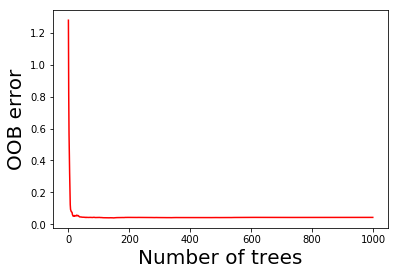

In [50]:
y=np.ravel(Y_array)
numTrees=1000
oobError=np.zeros(numTrees)

for i in range(0, numTrees):
    regr = RandomForestRegressor(random_state=3, n_estimators=i+1, max_features='sqrt', oob_score=True)
#     regr = RandomForestRegressor(max_depth=6, random_state=1, n_estimators=i+1)
    regr.fit(x, y)  
#     yPred = regr.oob_prediction_
    oobError[i] = 1-regr.oob_score_

plt.plot(range(0, numTrees), oobError, color='r')    
plt.xlabel('Number of trees', fontsize=20)
plt.ylabel('OOB error', fontsize=20)

pathRoot = 'C:/Users/linji/OneDrive - Umich/EECS545Fall2019/Project/randomForest/'
plt.savefig(pathRoot+'rfOOBmse')

In [43]:
print(oobError[-1])

0.04219235498208396


In [51]:
print(regr.feature_importances_)
# print(np.argsort(regr.feature_importances_))
order = np.argsort(regr.feature_importances_)
order = np.flip(order)
print(order)

[0.21927771 0.09960113 0.03604477 0.07889982 0.01782476 0.01587451
 0.10266342 0.04620033 0.06729973 0.0159147  0.07564364 0.06454391
 0.10554097 0.03138682 0.02328376]
[ 0 12  6  1  3 10  8 11  7  2 13 14  4  9  5]


In [18]:
print(regr.feature_importances_)
# print(np.argsort(regr.feature_importances_))
order = np.argsort(regr.feature_importances_)
order = np.flip(order)
print(order)

[0.21507059 0.09287705 0.03120901 0.06667219 0.02143817 0.01950296
 0.0957356  0.05587744 0.05280346 0.01690774 0.10189517 0.0666112
 0.09907249 0.03863258 0.02569435]
[ 0 10 12  6  1  3 11  7  8 13  2 14  4  5  9]


In [9]:
aaa=np.delete(X_array,0,1)
aaa.shape

(208, 14)

In [10]:
aaa

array([[-0.155, -0.055,  0.207, ..., -0.219,  0.019,  0.232],
       [-0.243,  0.193,  0.175, ...,  0.054,  0.172, -0.097],
       [ 0.007, -0.071,  0.072, ..., -0.057, -0.067,  0.026],
       ...,
       [-0.738,  0.592, -0.521, ..., -0.345, -0.101, -0.889],
       [-0.769,  0.612, -0.531, ..., -0.32 , -0.068, -0.889],
       [-0.753,  0.618, -0.515, ..., -0.309, -0.084, -0.874]])

In [13]:
y=np.ravel(y_train)
regr = RandomForestRegressor(max_depth=4, random_state=1,
                             n_estimators=200)
regr.fit(X_train, y)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [14]:
print(regr.feature_importances_)


[0.19578678 0.01091278 0.02105184 0.00814097 0.01287188 0.03172167
 0.0145678  0.01648086 0.00884103 0.24270152 0.0123846  0.37818869
 0.0250308  0.02131878]


In [5]:
yPred = regr.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test,yPred)
print (mse)


0.008679484245170418


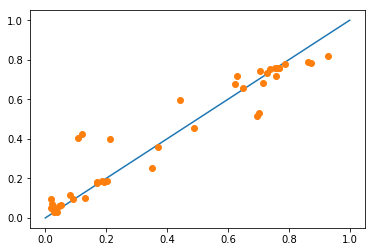

In [6]:
xx = np.linspace(0,1,100)
yy = np.linspace(0,1,100)
plt.clf()
plt.plot(xx,yy)
# plt.plot(y.numpy(), prediction.detach().numpy(), '.')
plt.plot(y_test, yPred, 'o')